### Read saliency map and original image and convert to corresponding same format

## GuidedBackProp

In [11]:
# read original image in .nii.gz
import nibabel as nib
import numpy as np
import os
import itk
import matplotlib.pyplot as plt
from monai.config import print_config
from monai.transforms import (
    EnsureChannelFirst,
    Compose,
    LoadImage,  # Adjusted from LoadImaged for direct image loading
    Rotate90,
    Flip,
    NormalizeIntensity,
    ThresholdIntensity,
    SpatialPad,
    Resize,
    Transpose,
)
image_shape = 301
depth = 40
val_transforms = Compose([
    LoadImage(image_only=True, ensure_channel_first=True, reader="ITKReader"),
    Rotate90(k=3),
    Flip(spatial_axis=1),
    NormalizeIntensity(subtrahend=15, divisor=85),
    ThresholdIntensity(threshold=0, above=True, cval=0.0),
    ThresholdIntensity(threshold=1, above=False, cval=0.0),
    SpatialPad(spatial_size=[-1, -1, depth], mode='constant', method="symmetric"),
    Resize(spatial_size=[image_shape, image_shape, depth]),
    # Transpose(indices=[0, 3, 1, 2])  # Adjust based on actual shape after previous transforms
])
# choose patientID to review
patientID = 128
label_name="POOR_PROGNOSIS"
map_type = "guidedBackProp"
layer=""
dir_saliency_map_prog="/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/ThreeClassGCS_BinaryAge_Prognosis_SameHP/SaliencyMapsPrognosis/MedCam/Fold0/"+map_type

saliency_map_path_prog=os.path.join(dir_saliency_map_prog, f"{patientID}_{map_type}-label-{label_name}.nii.gz")

saliency_map_nii_prog = nib.load(saliency_map_path_prog)
print("Shape saliency map prognosis:", saliency_map_nii_prog.shape)

dir_original_file=os.path.join("/home/ubuntu/tenerife/data/ICH_nii_StrippedSkull/", label_name)
original_file_path=os.path.join(dir_original_file, f'{patientID}_brain.nii.gz')
original_image_nii = itk.imread(original_file_path)
original_image = itk.GetArrayFromImage(original_image_nii)
print("Shape original image:", original_image_nii.shape)


# Convert NIfTI to numpy arrays
saliency_map_prog = saliency_map_nii_prog.get_fdata()
processed_image = val_transforms(original_file_path)
# squeeze processed image to 3D
processed_image = np.squeeze(processed_image)
print("Shape processed image:", processed_image.shape)

Shape saliency map prognosis: (301, 301, 40)
Shape original image: (32, 512, 512)
Shape processed image: (301, 301, 40)


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


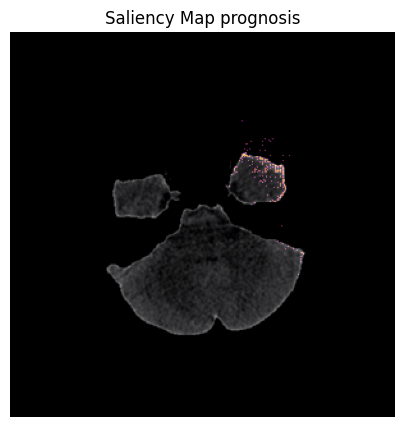

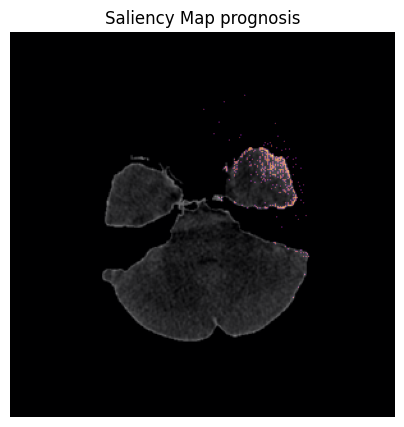

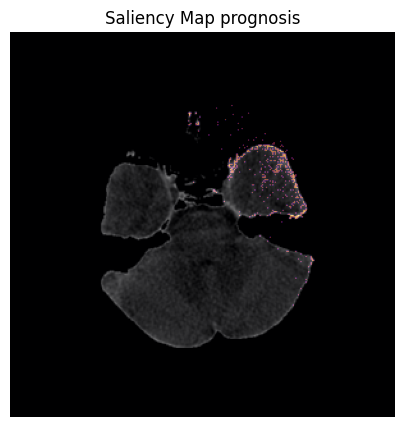

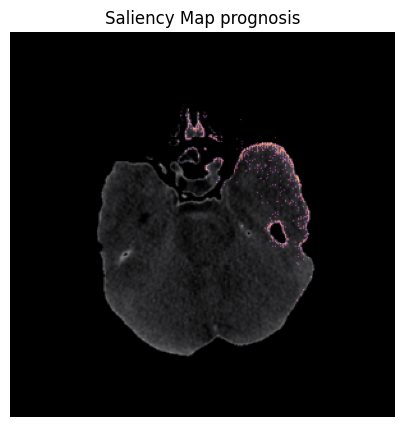

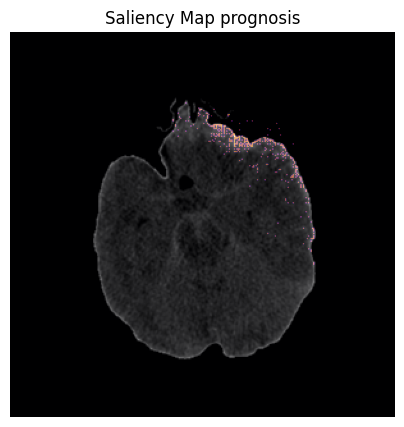

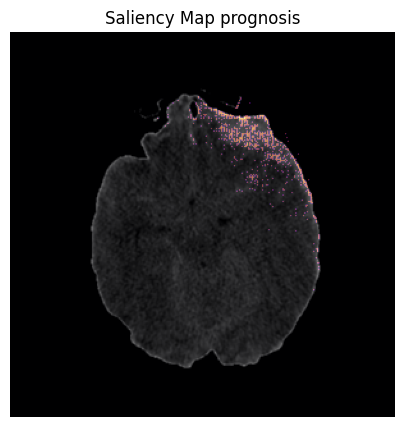

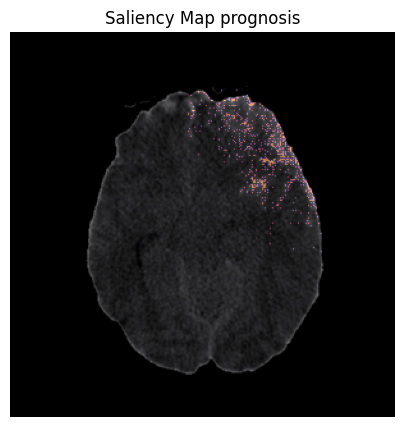

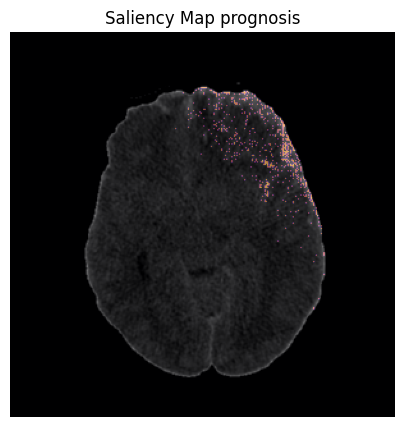

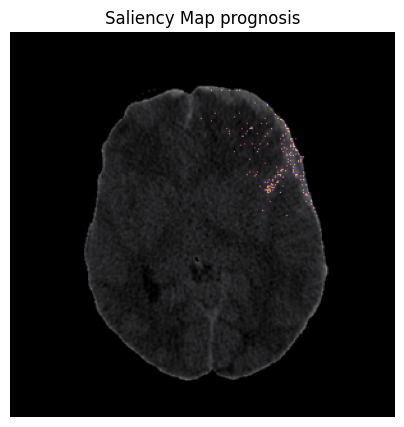

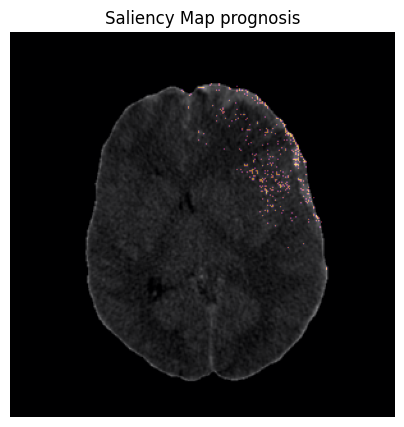

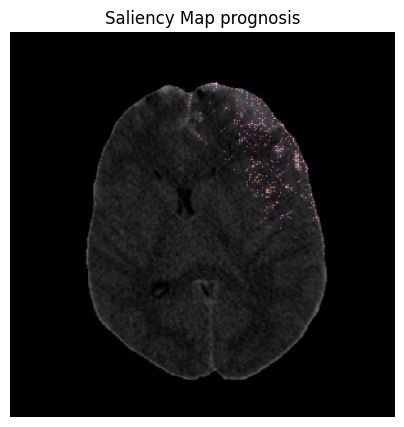

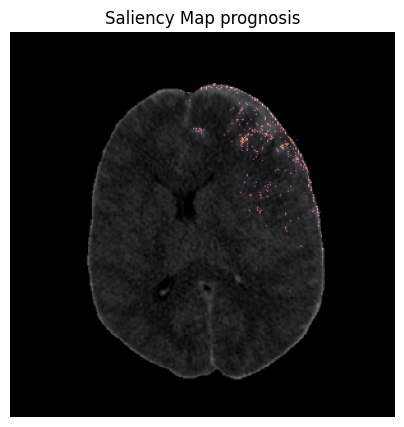

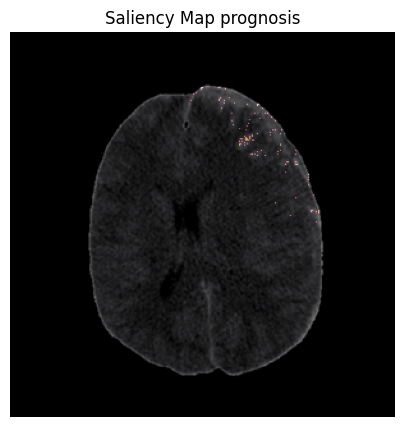

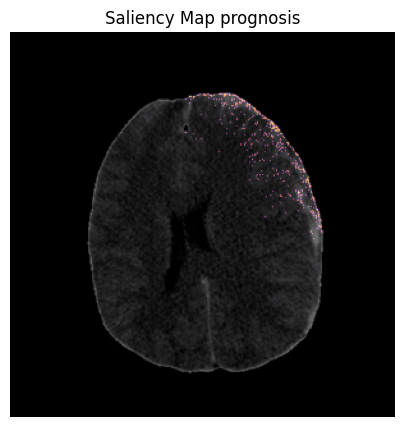

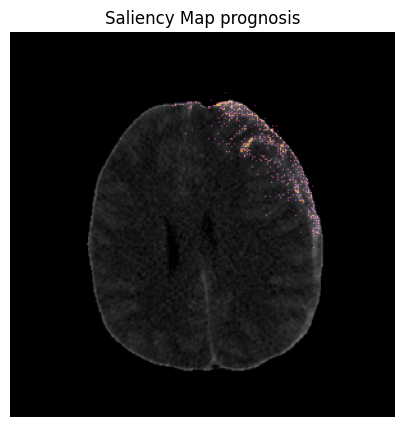

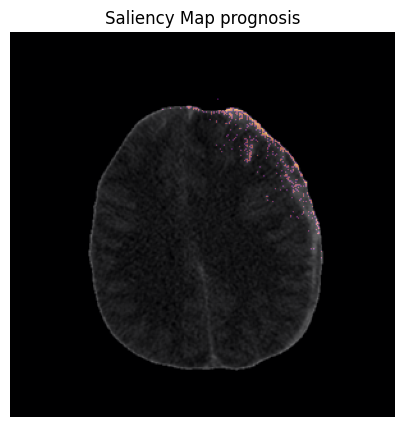

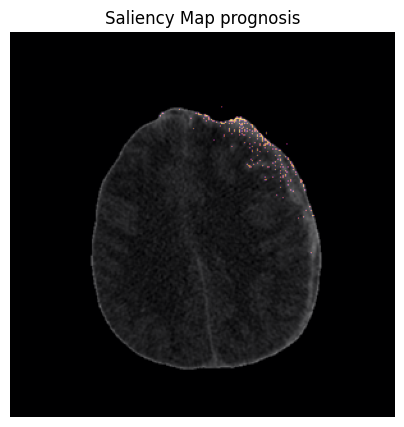

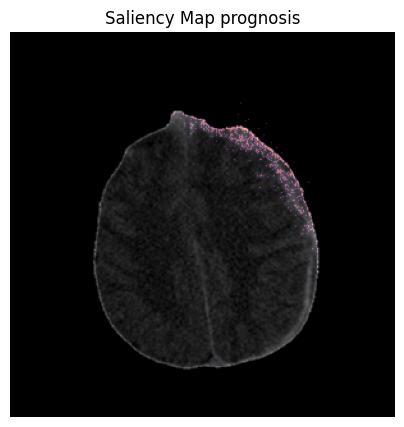

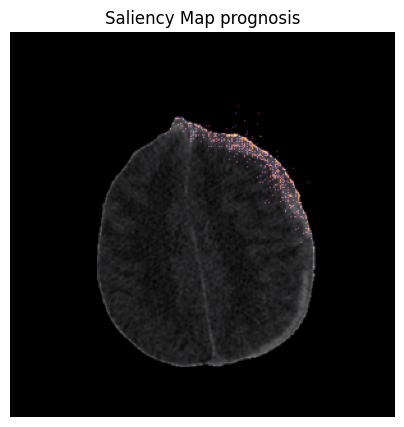

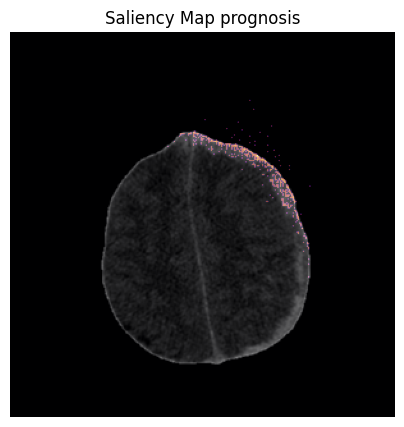

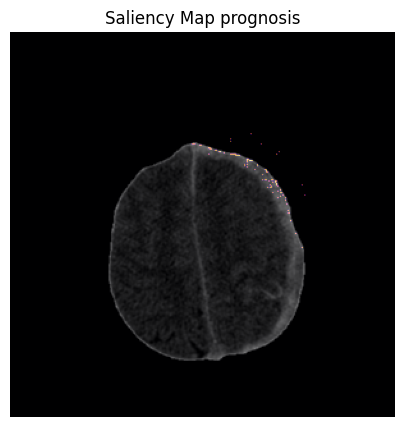

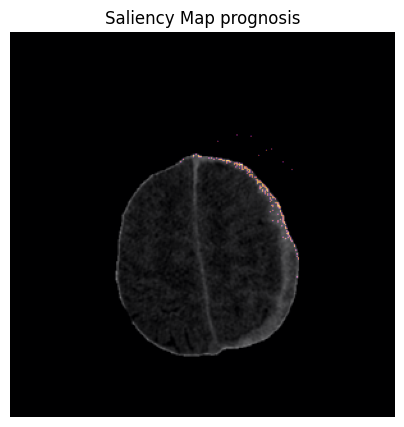

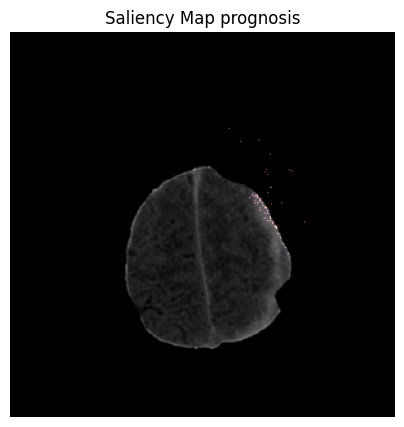

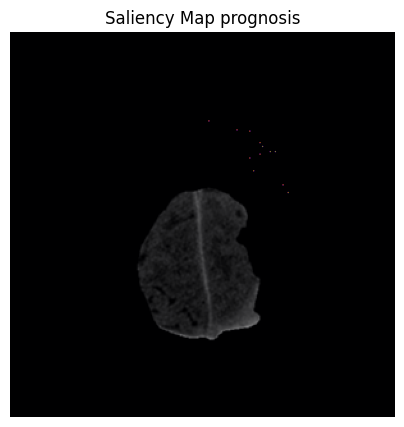

In [12]:
slice_index_range=range(10,34)
for slice_index in slice_index_range:
    dir_to_save_png_saliencyMap = os.path.join("/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/ThreeClassGCS_BinaryAge_Prognosis_SameHP/SaliencyMapsPrognosis/png_MedCam", map_type)
    dir_to_save_png_saliencyMap_patient = os.path.join(dir_to_save_png_saliencyMap, f"{patientID}-label-{label_name}")
    os.makedirs(dir_to_save_png_saliencyMap_patient, exist_ok=True)
    # normalize saliency_map
    saliency_map_normalized_prog = (saliency_map_prog - np.min(saliency_map_prog)) / (np.max(saliency_map_prog) - np.min(saliency_map_prog))
    # convert background of saliency_map to 0
    saliency_map_normalized_prog[saliency_map_normalized_prog < 0.5] = 0
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(processed_image[:, :, slice_index], cmap='gray')
    ax.imshow(saliency_map_normalized_prog[:, :, slice_index], cmap='inferno', alpha=0.5)
    ax.axis('off')
    ax.set_title('Saliency Map prognosis')
    # plt.savefig(os.path.join(dir_to_save_png_saliencyMap_patient, f"{patientID}_slice_{slice_index}_{map_type}-label-{label_name}.png"))

In [4]:
# read excel
import pandas as pd
import os
import numpy as np
df_amaia=pd.read_excel("/home/ubuntu/tenerife/data/ICH_nii_ReviseRadiologists/RespuestasAmaia.xlsx")
# drop last two rows of df_amaia
df_amaia.drop(df_amaia.tail(2).index,inplace=True)
df_amaia

ID  PRONÓSTICO (AMAIA)  LABEL  CONCORDANCIA  \
0    12.0                 1.0    1.0            OK   
1    20.0                 0.0    1.0  DISCORDANCIA   
2    34.0                 0.0    0.0            OK   
3    51.0                 0.0    0.0            OK   
4    56.0                 0.0    1.0  DISCORDANCIA   
5    59.0                 0.0    1.0  DISCORDANCIA   
6    71.0                 1.0    0.0  DISCORDANCIA   
7    90.0                 0.0    0.0            OK   
8    92.0                 0.0    1.0  DISCORDANCIA   
9    93.0                 1.0    0.0  DISCORDANCIA   
10  106.0                 1.0    1.0            OK   
11  116.0                 0.0    1.0  DISCORDANCIA   
12  128.0                 1.0    1.0            OK   
13  137.0                 1.0    1.0            OK   
14  140.0                 0.0    1.0  DISCORDANCIA   
15  152.0                 0.0    0.0            OK   
16  170.0                 0.0    1.0  DISCORDANCIA   
17  187.0                 0.0    0.0            OK   
18  197.0                 1.0    1.0            OK   
19  103.0                 0.0    0.0            OK   
20  214.0                 1.0    1.0            OK   
21  245.0                 1.0    1.0            OK   
22  251.0                 1.0    1.0            OK   
23  258.0                 1.0    1.0            OK   
24  265.0                 1.0    1.0            OK   
25  268.0                 0.0    0.0            OK   
26  292.0                 0.0    0.0            OK   

                                               MOTIVO  
0                                                 NaN  
1   Hematomas subdurales bilaterales. Como no hay ...  
2                                                 NaN  
3                                                 NaN  
4   Hematoma de gran tamaño pero sin HIV ni signif...  
5                   Hematoma subdural derecho agudo.   
6   Gran volumen y abierto a ventrículos (HIV). Pa...  
7                                                 NaN  
8   CON DUDAS HE PUESTO BUEN PRONÓSTICO. Es cierto...  
9    HIV y mucho volumen. Para mi es mal pronóstico.   
10                                                NaN  
11  Tiene focos de HSA... Puede ser mal pronóstico...  
12                                                NaN  
13                           DUDAS. Parecido al 258.   
14  DUDAS. He puesto buen pronóstico por ser subdu...  
15                                                NaN  
16  Es cierto que es de gran volumen, aunque no HI...  
17                                                NaN  
18                                                NaN  
19                                                NaN  
20           DUDAS, porque no fosa posterior ni HIV.   
21                                                NaN  
22                                                NaN  
23  DUDAS. HIV e hidrocefalia. No obstante, he dud...  
24                                                NaN  
25                                                NaN  
26                                                NaN

In [5]:
# read csv
df=pd.read_csv("/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/ThreeClassGCS_BinaryAge_Prognosis_SameHP/test_labels_df_ThreeClassGCS_BinaryAge_Prognosis_SAMEPARAMETERS_asBinaryGCS_BinaryAge_Prognosis_No_pos_weight.csv")
# select only Fold=0
df_fold0=df[df["Fold"]==0]
df_fold0.shape

(27, 9)

In [6]:
df_fold0.columns

Index(['Fold', 'True_labels_GCS', 'Predicted_labels_test_th0.5_GCS',
       'True_labels', 'Probabilities_labels_test',
       'Predicted_labels_test_th0.5', 'True_labels_Age',
       'Probabilities_labels_test_Age', 'Predicted_labels_test_th0.5_Age'],
      dtype='object')

In [7]:
df_amaia['Model_probability_test'] = df_fold0['Probabilities_labels_test']
df_amaia['Model_prediction_test'] = df_fold0['Predicted_labels_test_th0.5']

In [8]:
# check if df_amaia['LABEL'] is the same as df_fold0['True_labels']
df_amaia['LABEL'].equals(df_fold0['True_labels'])

True

In [9]:
df_amaia

ID  PRONÓSTICO (AMAIA)  LABEL  CONCORDANCIA  \
0    12.0                 1.0    1.0            OK   
1    20.0                 0.0    1.0  DISCORDANCIA   
2    34.0                 0.0    0.0            OK   
3    51.0                 0.0    0.0            OK   
4    56.0                 0.0    1.0  DISCORDANCIA   
5    59.0                 0.0    1.0  DISCORDANCIA   
6    71.0                 1.0    0.0  DISCORDANCIA   
7    90.0                 0.0    0.0            OK   
8    92.0                 0.0    1.0  DISCORDANCIA   
9    93.0                 1.0    0.0  DISCORDANCIA   
10  106.0                 1.0    1.0            OK   
11  116.0                 0.0    1.0  DISCORDANCIA   
12  128.0                 1.0    1.0            OK   
13  137.0                 1.0    1.0            OK   
14  140.0                 0.0    1.0  DISCORDANCIA   
15  152.0                 0.0    0.0            OK   
16  170.0                 0.0    1.0  DISCORDANCIA   
17  187.0                 0.0    0.0            OK   
18  197.0                 1.0    1.0            OK   
19  103.0                 0.0    0.0            OK   
20  214.0                 1.0    1.0            OK   
21  245.0                 1.0    1.0            OK   
22  251.0                 1.0    1.0            OK   
23  258.0                 1.0    1.0            OK   
24  265.0                 1.0    1.0            OK   
25  268.0                 0.0    0.0            OK   
26  292.0                 0.0    0.0            OK   

                                               MOTIVO  Model_probability_test  \
0                                                 NaN                0.457137   
1   Hematomas subdurales bilaterales. Como no hay ...                0.409046   
2                                                 NaN                0.396868   
3                                                 NaN                0.362136   
4   Hematoma de gran tamaño pero sin HIV ni signif...                0.468165   
5                   Hematoma subdural derecho agudo.                 0.558870   
6   Gran volumen y abierto a ventrículos (HIV). Pa...                0.459550   
7                                                 NaN                0.473401   
8   CON DUDAS HE PUESTO BUEN PRONÓSTICO. Es cierto...                0.713516   
9    HIV y mucho volumen. Para mi es mal pronóstico.                 0.457207   
10                                                NaN                0.558237   
11  Tiene focos de HSA... Puede ser mal pronóstico...                0.944191   
12                                                NaN                0.373674   
13                           DUDAS. Parecido al 258.                 0.562493   
14  DUDAS. He puesto buen pronóstico por ser subdu...                0.514487   
15                                                NaN                0.630995   
16  Es cierto que es de gran volumen, aunque no HI...                0.908752   
17                                                NaN                0.367044   
18                                                NaN                0.672586   
19                                                NaN                0.389592   
20           DUDAS, porque no fosa posterior ni HIV.                 0.485305   
21                                                NaN                0.512750   
22                                                NaN                0.563007   
23  DUDAS. HIV e hidrocefalia. No obstante, he dud...                0.807819   
24                                                NaN                0.439724   
25                                                NaN                0.643326   
26                                                NaN                0.541077   

    Model_prediction_test  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
5                     1.0  
6                     0.0  
7

In [10]:
import numpy as np
import pandas as pd
# read df_clinical_data
clinical_data = pd.read_csv('/home/ubuntu/tenerife/data/ICH_tabular_data/CLINICAL_DATA_ICH.csv', delimiter=',')
clinical_data = clinical_data.rename(columns={'PatientID': 'Patient'})
clinical_data[clinical_data['Patient'] == 92].GCS.values

array([11])

### Guided-Gad-Cam

In [14]:
# read original image in .nii.gz
import nibabel as nib
import numpy as np
import os
import itk
import matplotlib.pyplot as plt
from monai.config import print_config
from monai.transforms import (
    EnsureChannelFirst,
    Compose,
    LoadImage,  # Adjusted from LoadImaged for direct image loading
    Rotate90,
    Flip,
    NormalizeIntensity,
    ThresholdIntensity,
    SpatialPad,
    Resize,
    Transpose,
)
image_shape = 301
depth = 40
val_transforms = Compose([
    LoadImage(image_only=True, ensure_channel_first=True, reader="ITKReader"),
    Rotate90(k=3),
    Flip(spatial_axis=1),
    NormalizeIntensity(subtrahend=15, divisor=85),
    ThresholdIntensity(threshold=0, above=True, cval=0.0),
    ThresholdIntensity(threshold=1, above=False, cval=0.0),
    SpatialPad(spatial_size=[-1, -1, depth], mode='constant', method="symmetric"),
    Resize(spatial_size=[image_shape, image_shape, depth]),
    # Transpose(indices=[0, 3, 1, 2])  # Adjust based on actual shape after previous transforms
])
# choose patientID to review
patientID = 92
label_name="POOR_PROGNOSIS"
map_type = "Guided-Grad-Cam"
layer="__feature_extractor.features.transition3.conv"
dir_saliency_map_prog="/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/ThreeClassGCS_BinaryAge_Prognosis_SameHP/SaliencyMapsPrognosis/MedCam/Fold0/"+map_type+layer

saliency_map_path_prog=os.path.join(dir_saliency_map_prog, f"{patientID}_{map_type}-label-{label_name}.nii.gz")

saliency_map_nii_prog = nib.load(saliency_map_path_prog)
print("Shape saliency map prognosis:", saliency_map_nii_prog.shape)

dir_original_file=os.path.join("/home/ubuntu/tenerife/data/ICH_nii_StrippedSkull/", label_name)
original_file_path=os.path.join(dir_original_file, f'{patientID}_brain.nii.gz')
original_image_nii = itk.imread(original_file_path)
original_image = itk.GetArrayFromImage(original_image_nii)
print("Shape original image:", original_image_nii.shape)


# Convert NIfTI to numpy arrays
saliency_map_prog = saliency_map_nii_prog.get_fdata()
processed_image = val_transforms(original_file_path)
# squeeze processed image to 3D
processed_image = np.squeeze(processed_image)
print("Shape processed image:", processed_image.shape)

Shape saliency map prognosis: (301, 301, 40)
Shape original image: (28, 512, 512)
Shape processed image: (301, 301, 40)


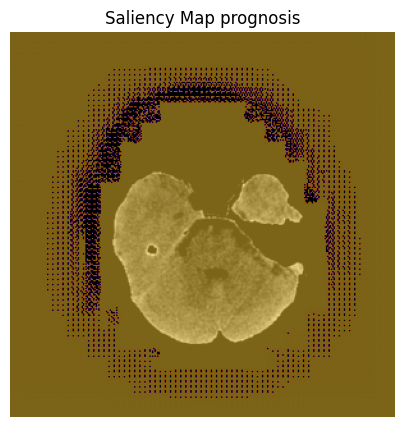

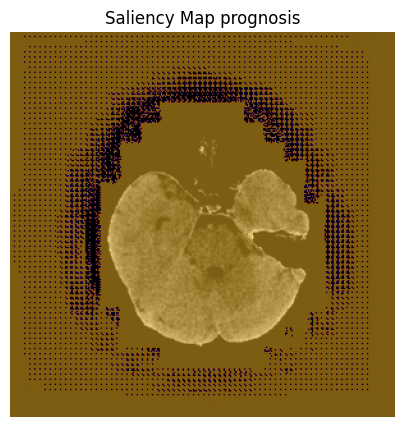

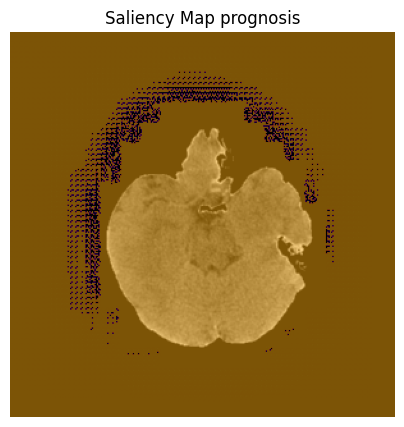

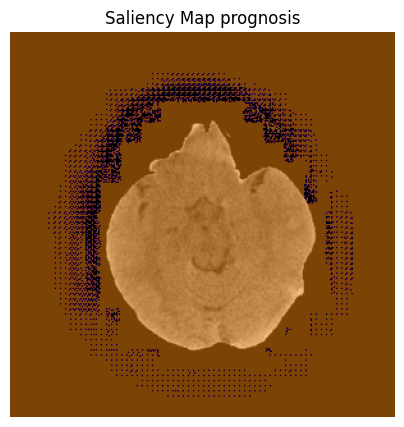

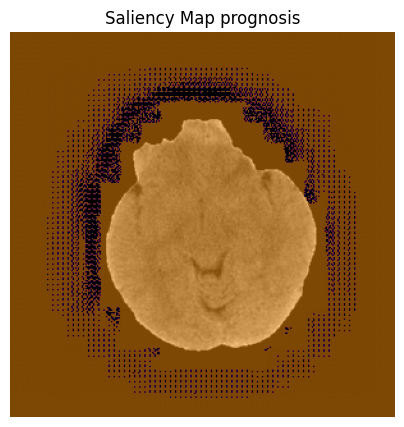

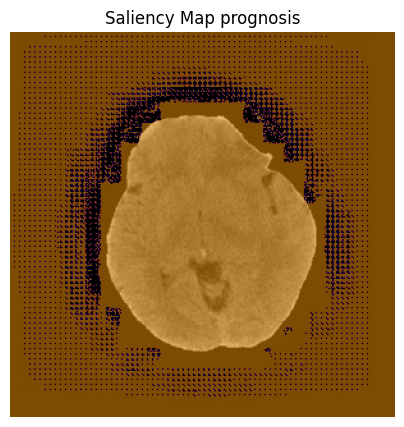

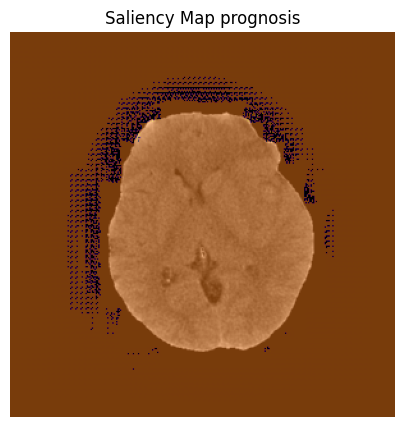

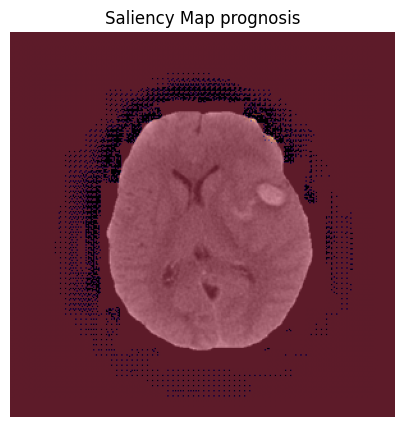

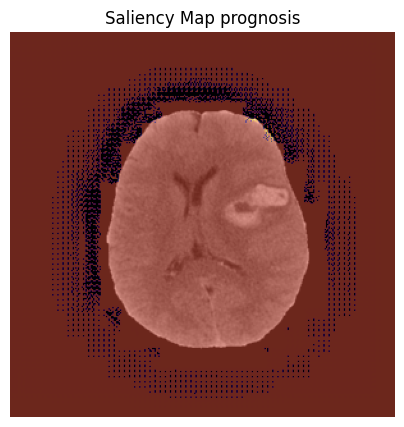

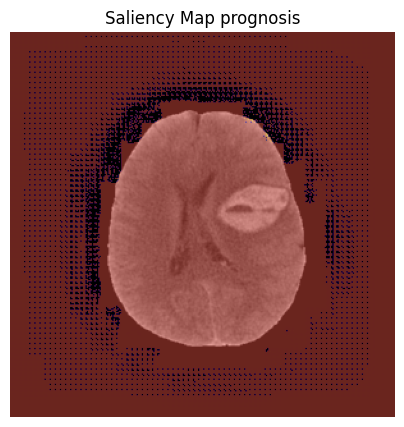

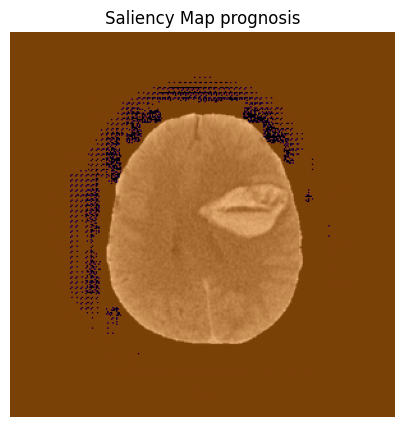

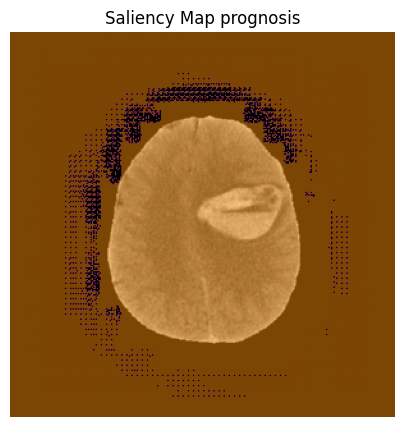

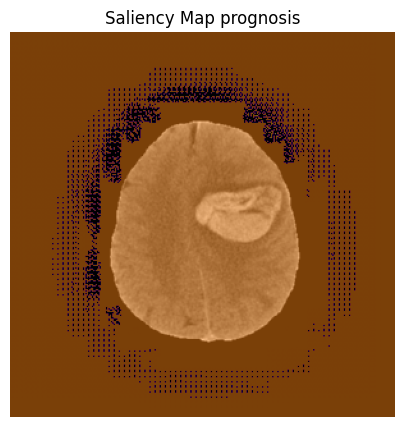

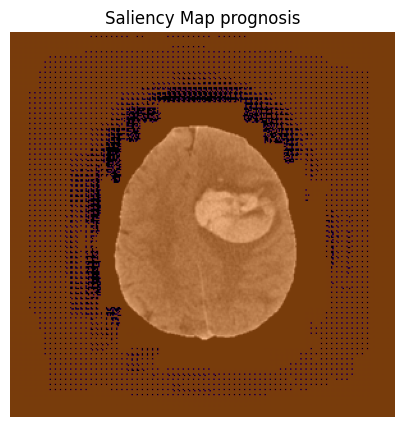

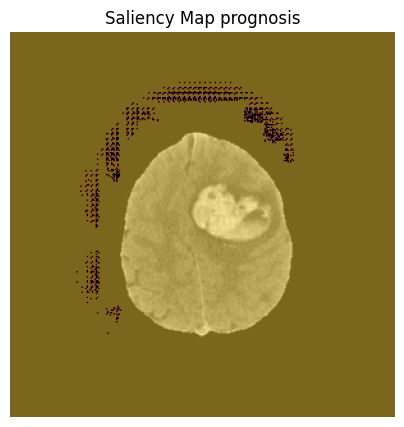

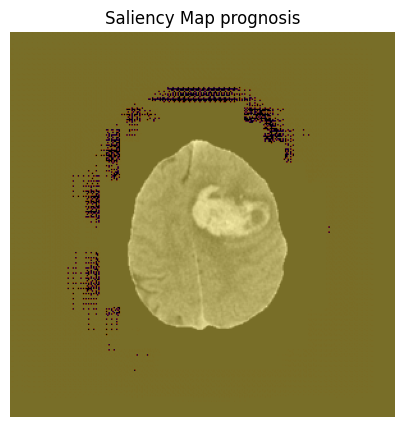

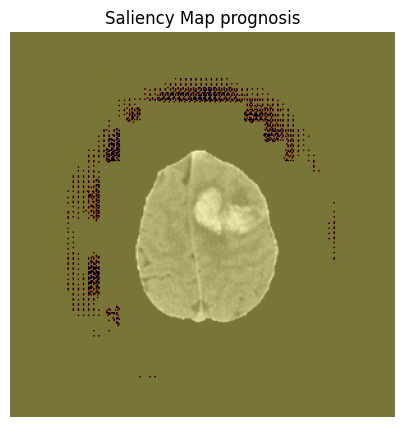

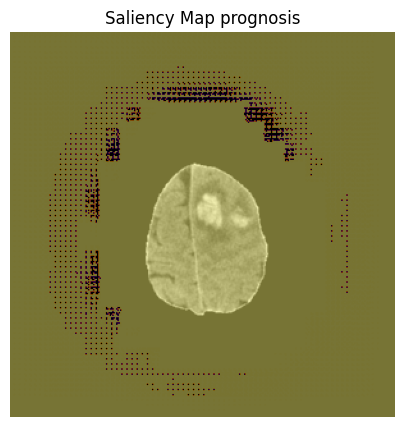

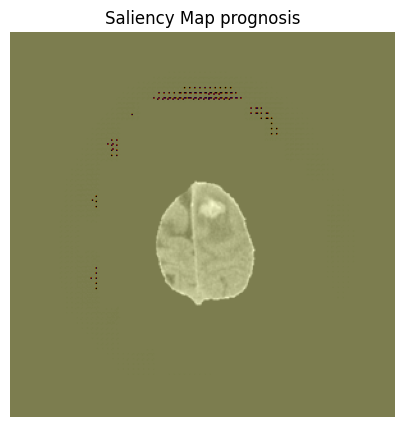

In [15]:
slice_index_range=range(12,31)
for slice_index in slice_index_range:
    dir_to_save_png_saliencyMap = os.path.join("/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/ThreeClassGCS_BinaryAge_Prognosis_SameHP/SaliencyMapsPrognosis/png_MedCam", map_type)
    dir_to_save_png_saliencyMap_patient = os.path.join(dir_to_save_png_saliencyMap, f"{patientID}-label-{label_name}")
    os.makedirs(dir_to_save_png_saliencyMap_patient, exist_ok=True)
    # normalize saliency_map
    saliency_map_normalized_prog = (saliency_map_prog - np.min(saliency_map_prog)) / (np.max(saliency_map_prog) - np.min(saliency_map_prog))
    # convert background of saliency_map to 0
    saliency_map_normalized_prog[saliency_map_normalized_prog < 0.5] = 0
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(processed_image[:, :, slice_index], cmap='gray')
    ax.imshow(saliency_map_normalized_prog[:, :, slice_index], cmap='inferno', alpha=0.5)
    ax.axis('off')
    ax.set_title('Saliency Map prognosis')
    plt.savefig(os.path.join(dir_to_save_png_saliencyMap_patient, f"{patientID}_slice_{slice_index}_{map_type}-label-{label_name}.png"))